# Q6 Imagine you have a dataset where you have predicted loan Eligibility using any 4 different classification algorithms. Now you have to build a model which can predict loan Eligibility and you need to find the accuracy of the model and built-in docker and use some library to display that in frontend

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Result,Initial Payment,Last Payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094


In [4]:
df.describe()

,Initial Payment,Last Payment,Credit Score,House Number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


In [5]:
df.dtypes

Result             object
Initial Payment     int64
Last Payment        int64
Credit Score        int64
House Number        int64
dtype: object

In [6]:
df.isnull().sum()

Result             0
Initial Payment    0
Last Payment       0
Credit Score       0
House Number       0
dtype: int64

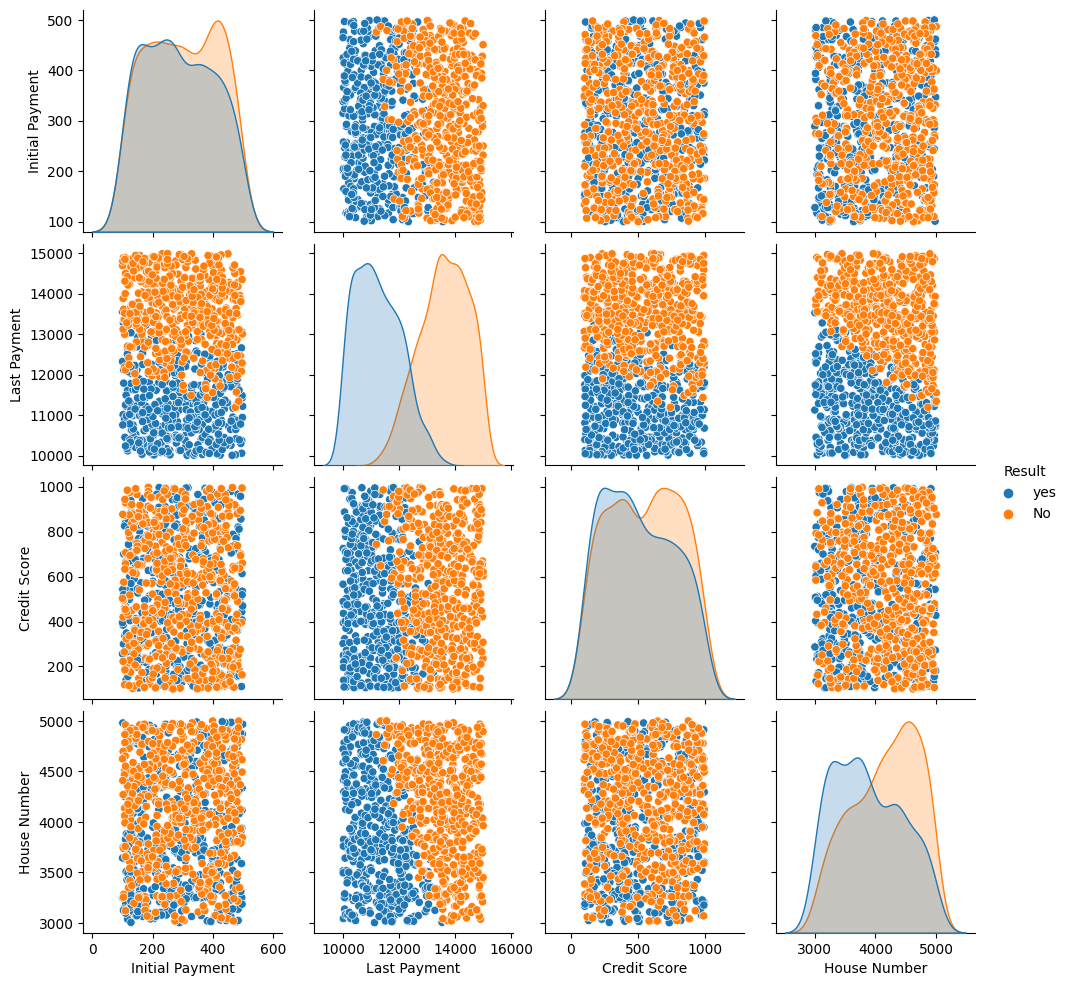

In [7]:
sns.pairplot(df, hue="Result")

In [8]:
(df.Result.value_counts()*100)/len(df)

Result
No     52.1
yes    47.9
Name: count, dtype: float64

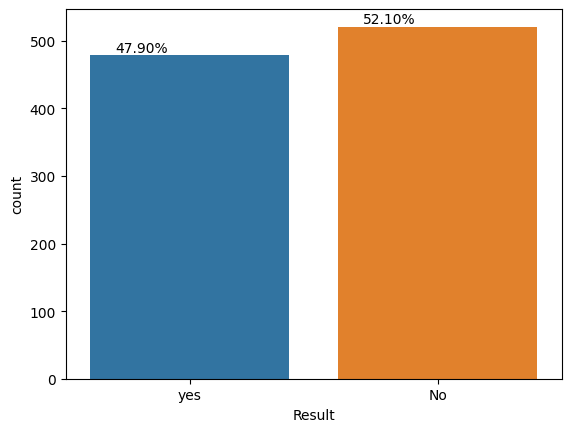

In [9]:
ax = sns.countplot(x="Result", data=df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+5))
plt.show()

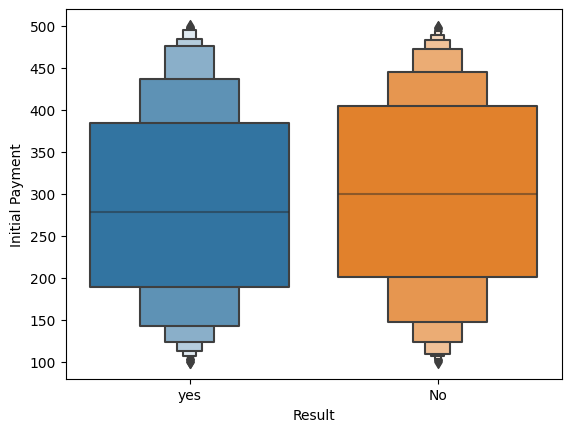

In [10]:
sns.boxenplot(data=df, x='Result', y = 'Initial Payment')
plt.show()

In [11]:
#The boxen plot shows that there are no outliers in the Initial payment column. Also, other than the median values, the range of values of both the customers who loan was approved and rejected are the same.

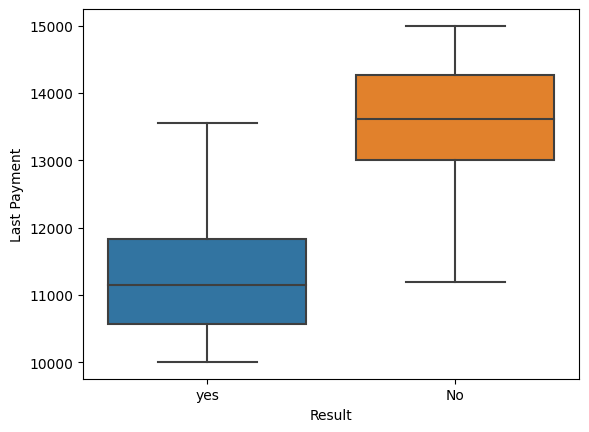

In [12]:
sns.boxplot(data=df, x='Result', y = 'Last Payment')
plt.show()

In [13]:
X = df.values[:,1:5]
Y = df.values[:,0]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [15]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state =100, max_depth=3, min_samples_leaf=5)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [16]:
y_pred = dtc.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [17]:
accuracy_score(Y_test,y_pred)*100

93.66666666666667

In [20]:
confusion_matrix(Y_test, y_pred)

array([[134,  13],
       [  6, 147]], dtype=int64)